<a href="https://colab.research.google.com/github/sobiya1234/Machine-Learning/blob/main/ML_Capstone_Project_Credit_Card_Fraud_Detection_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#🔑 **Key Concepts in Fraud Detection Project**
1. **Exploratory Data Analysis (EDA)**
Analyzed distributions of categorical features like Card_Type, Merchant_Category, Location.

Explored numerical features such as Transaction_Amount, Cardholder_Age, Monthly_Income, and Average_Spend.

Visualized fraud vs. non-fraud transactions using boxplots and histograms.

Identified patterns and features more susceptible to fraud.

2. **Data Preprocessing**
Handled missing values using median (for numerical) and mode (for categorical), or KNN imputation.

Detected and treated outliers using IQR/Z-score techniques.

Assessed and corrected skewness using log/sqrt transformations.

Encoded categorical features using Label Encoding or One-Hot Encoding.

Scaled numerical features using StandardScaler or MinMaxScaler.

Ensured class balance was maintained during train-test split via stratification.

3. **Feature Selection**
Removed irrelevant/redundant features (e.g., IDs, highly correlated columns).

Used correlation analysis, feature importance (Random Forest), and Chi-Square tests.

Selected top features most impactful to fraud prediction.

4. **Model Building**
Built and compared several classifiers:

Logistic Regression

Naive Bayes

Decision Tree

Random Forest

K-Nearest Neighbors

Support Vector Machine (SVM)

Trained each on the training data and evaluated using accuracy and F1-score.

5. **Model Evaluation**
Selected Random Forest as the best model based on highest F1-score.

Evaluated performance using:

Accuracy

Precision

Recall

F1-Score

Confusion Matrix

Interpreted results to assess model effectiveness in detecting fraud.

6. **Validation**
Validated model performance on the test set.

Ensured model generalizes well without overfitting.

Addressed class imbalance impact using F1-score and Recall.

7. **Interpretation & Insights**

Identified high-risk categories and amounts associated with fraud.


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
csvfile='https://raw.githubusercontent.com/ArchanaInsights/Datasets/refs/heads/main/credit_card_transactions.csv'
df=pd.read_csv(csvfile)

In [ ]:
df.head()

,Transaction_ID,Card_Type,Merchant_Category,Transaction_Amount,Transaction_DateTime,Location,Region,Cardholder_Age,Cardholder_Gender,Cardholder_Monthly_Income,Cardholder_Average_Spend,Credit_Limit,Device_Type,Day_of_Week,Is_Fraudulent
0,W963UK57,Mastercard,Utility bill,27214.0,2020-01-01 09:43:17,Patna,East,23.0,Female,94632.0,36369.65,100000.0,Unknown,Wednesday,No
1,V606KV56,American Express,Retail,83956.0,2020-01-03 16:26:13,Surat,West,49.0,Male,148118.0,89179.12,150000.0,Desktop,Friday,No
2,R531NU70,Visa,Transportation,193280.0,2020-01-04 03:40:49,Patna,East,NaN,Male,210921.0,106668.60,200000.0,Desktop,Saturday,No
3,T783GF79,RuPay,Online Shopping,167381.0,2020-01-04 14:56:24,Surat,West,52.0,Female,148070.0,173155.52,200000.0,Desktop,Saturday,Yes
4,K256ZN73,RuPay,Retail,81170.0,2020-01-04 17:26:47,Lucknow,North,37.0,Female,174470.0,52713.09,200000.0,Mobile,Saturday,No


In [ ]:
rows , columns = df.shape
print(f"Number of rows: {rows}")
print(f"Number of columns: {columns}")

Number of rows: 5000
Number of columns: 15


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 15 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Transaction_ID             5000 non-null   object 
 1   Card_Type                  4983 non-null   object 
 2   Merchant_Category          4978 non-null   object 
 3   Transaction_Amount         4994 non-null   float64
 4   Transaction_DateTime       5000 non-null   object 
 5   Location                   5000 non-null   object 
 6   Region                     5000 non-null   object 
 7   Cardholder_Age             4865 non-null   float64
 8   Cardholder_Gender          4911 non-null   object 
 9   Cardholder_Monthly_Income  4686 non-null   float64
 10  Cardholder_Average_Spend   4792 non-null   float64
 11  Credit_Limit               4991 non-null   float64
 12  Device_Type                4960 non-null   object 
 13  Day_of_Week                5000 non-null   objec

In [ ]:
print("\nMissing values in each column:")
missing_values = df.isnull().sum()
missing_values


Missing values in each column:


,0
Transaction_ID,0
Card_Type,17
Merchant_Category,22
Transaction_Amount,6
Transaction_DateTime,0
Location,0
Region,0
Cardholder_Age,135
Cardholder_Gender,89
Cardholder_Monthly_Income,314


In [ ]:
df.columns

Index(['Transaction_ID', 'Card_Type', 'Merchant_Category',
       'Transaction_Amount', 'Transaction_DateTime', 'Location', 'Region',
       'Cardholder_Age', 'Cardholder_Gender', 'Cardholder_Monthly_Income',
       'Cardholder_Average_Spend', 'Credit_Limit', 'Device_Type',
       'Day_of_Week', 'Is_Fraudulent'],
      dtype='object')

# **Exploratory Data Analysis (EDA):**

##Analyze the distribution of categorical features such as Card_Type, Merchant_Category, Location, etc.

Card_Type: Most transactions involve Visa, followed by RuPay, Mastercard, and American Express.

Merchant_Category: Retail and Online Shopping dominate the merchant categories.

Location: Locations like Surat, Kochi, and Bangalore appear most frequently.

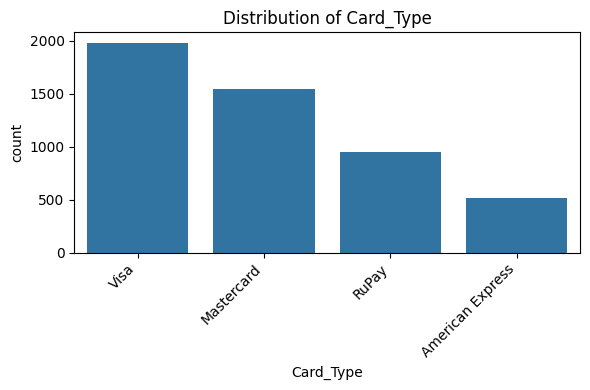

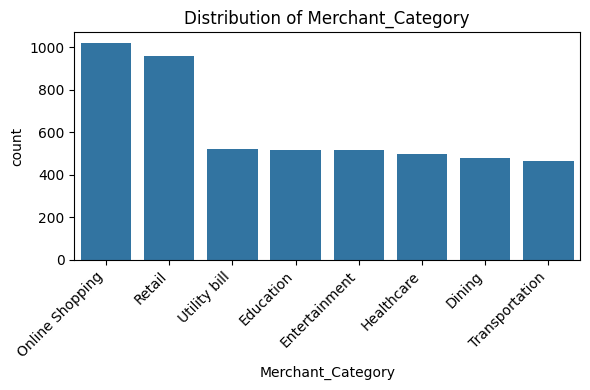

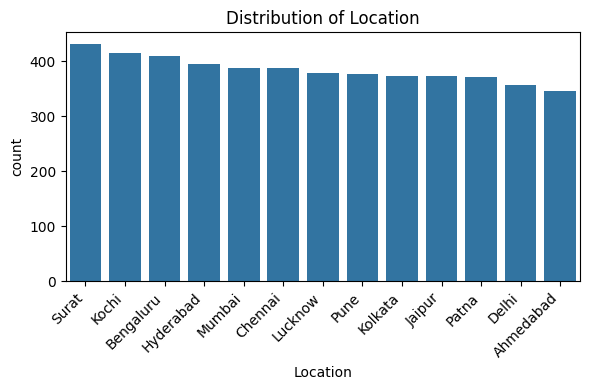

In [ ]:
categorical_features = ['Card_Type', 'Merchant_Category', 'Location']

for feature in categorical_features:
    plt.figure(figsize=(6, 4))
    sns.countplot(data=df, x=feature, order=df[feature].value_counts().index)
    plt.title(f'Distribution of {feature}')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

##Explore numerical features like Transaction_Amount, Cardholder_Age,Cardholder_Monthly_Income, and Cardholder_Average_Spend.Use descriptive statistics to understand their central tendency and spread.

In [ ]:
numerical_features = ['Transaction_Amount', 'Cardholder_Age',
                      'Cardholder_Monthly_Income', 'Cardholder_Average_Spend']
df[numerical_features].describe()

,Transaction_Amount,Cardholder_Age,Cardholder_Monthly_Income,Cardholder_Average_Spend
count,4994.000000,4865.000000,4686.000000,4792.000000
mean,74667.995995,49.106680,137353.817542,63058.343566
std,43089.045623,18.398524,69471.623020,40056.989704
min,25008.000000,18.000000,35005.000000,10282.410000
25%,39742.500000,33.000000,73485.000000,33336.742500
50%,60922.000000,49.000000,131833.000000,49547.945000
75%,98373.500000,65.000000,189054.250000,83732.352500
max,199923.000000,80.000000,299907.000000,199898.290000


##Conduct bivariate and multivariate analysis to identify potential relationships between the features as well as with the target variable (Is_Fraudulent).

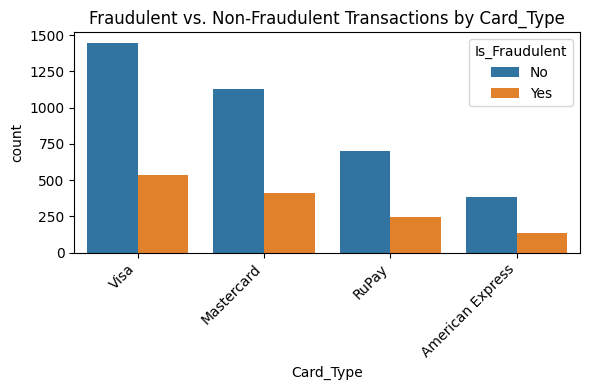

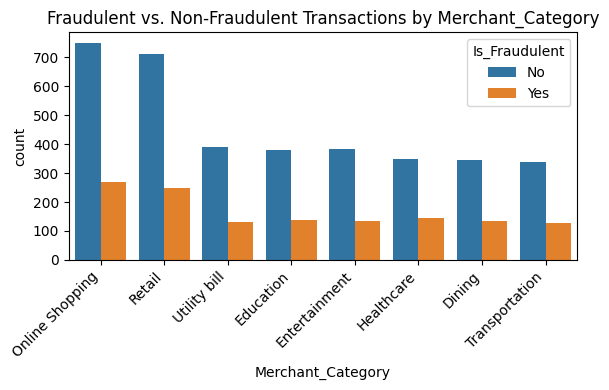

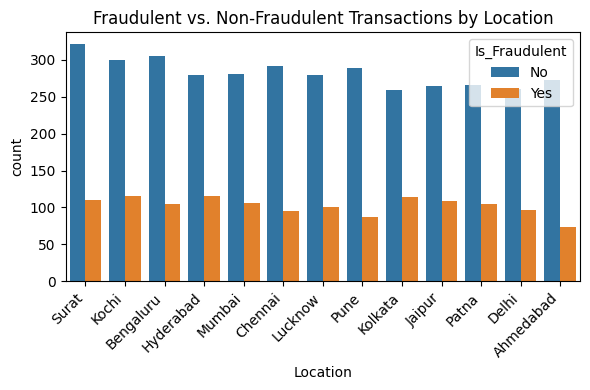

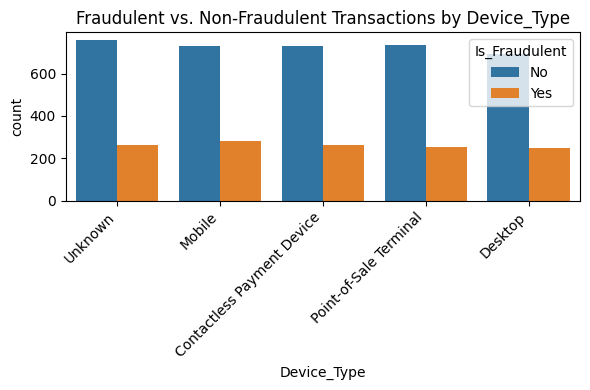

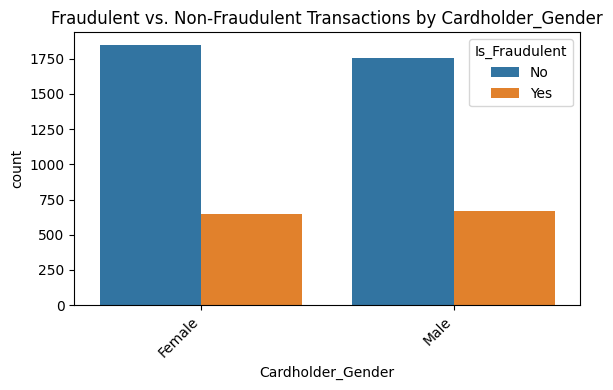

In [ ]:
# Bivariate analysis of categorical features with the target variable
categorical_features = ['Card_Type', 'Merchant_Category', 'Location', 'Device_Type', 'Cardholder_Gender']
for feature in categorical_features:
    plt.figure(figsize=(6, 4))
    sns.countplot(data=df, x=feature, hue='Is_Fraudulent', order=df[feature].value_counts().index)
    plt.title(f'Fraudulent vs. Non-Fraudulent Transactions by {feature}')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

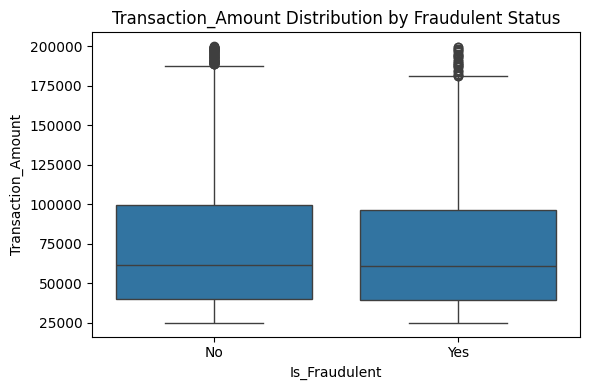

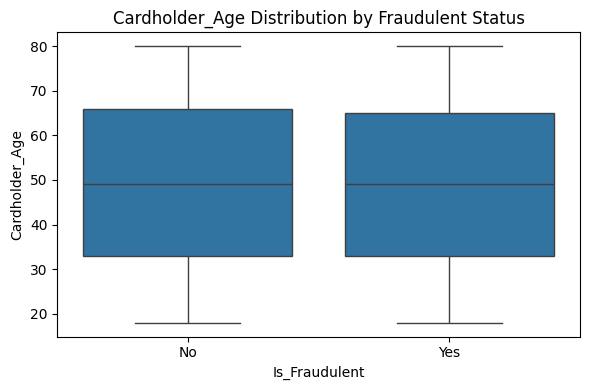

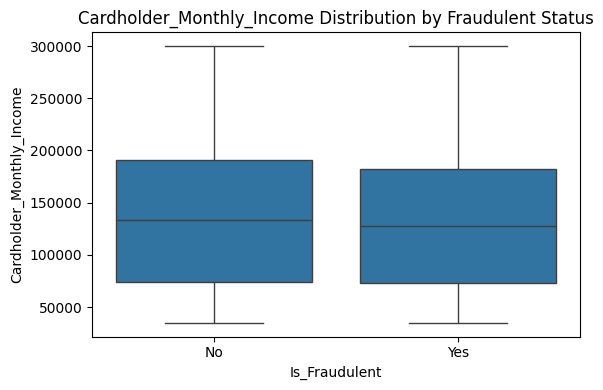

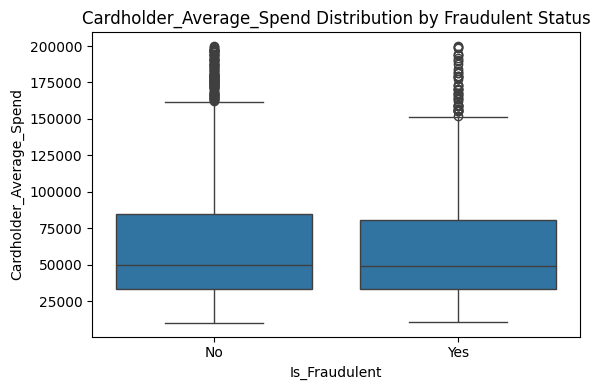

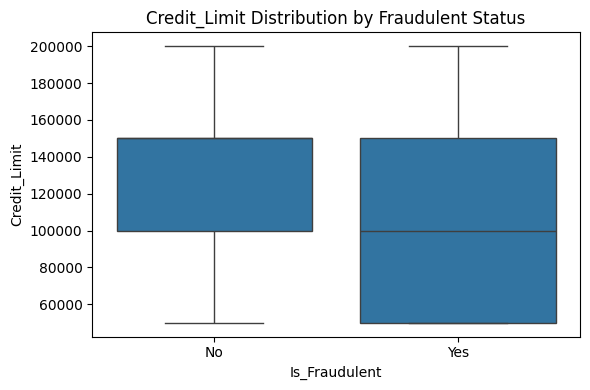

In [ ]:
# Bivariate analysis of numerical features with the target variable
numerical_features = ['Transaction_Amount', 'Cardholder_Age', 'Cardholder_Monthly_Income', 'Cardholder_Average_Spend', 'Credit_Limit']
for feature in numerical_features:
    plt.figure(figsize=(6, 4))
    sns.boxplot(data=df, x='Is_Fraudulent', y=feature)
    plt.title(f'{feature} Distribution by Fraudulent Status')
    plt.tight_layout()
    plt.show()

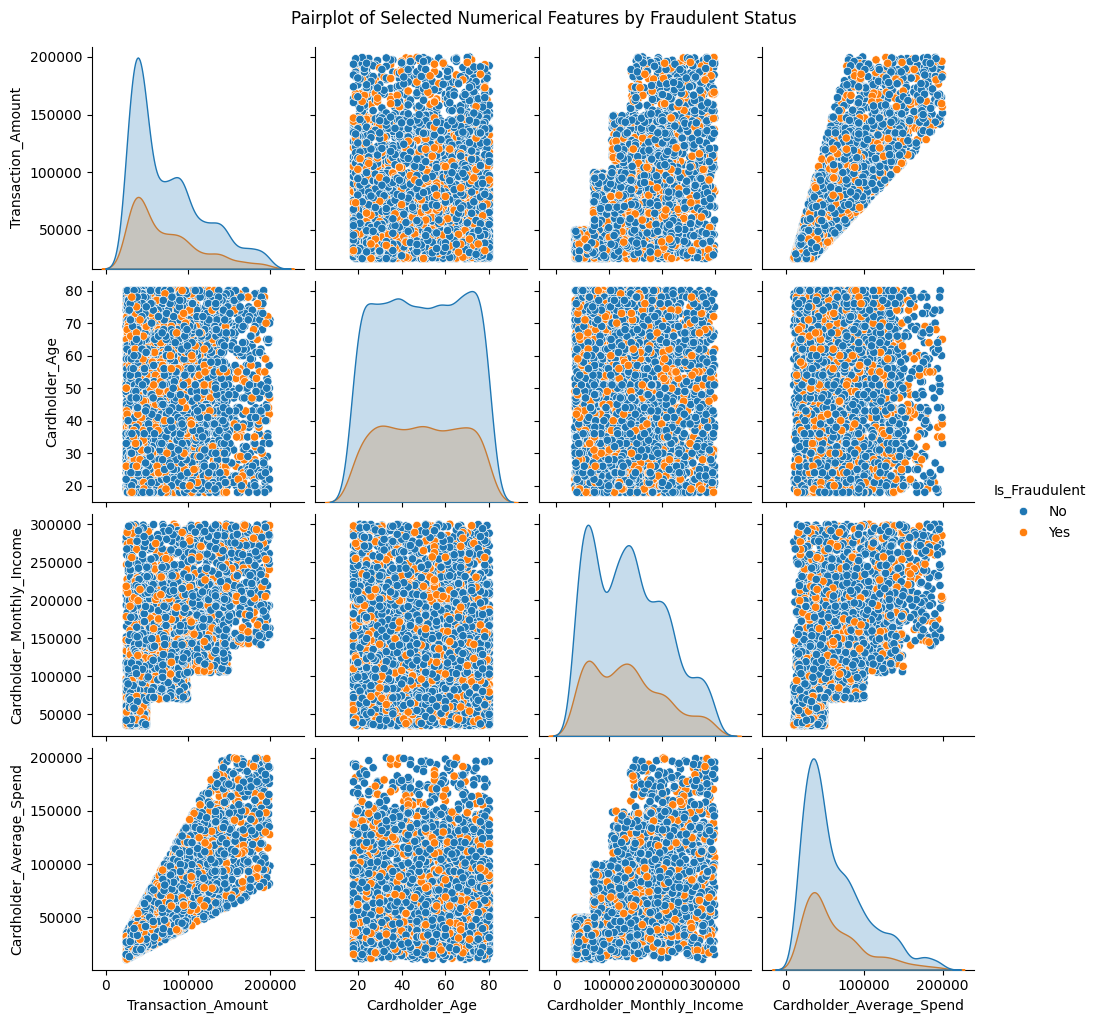

<Figure size 600x400 with 0 Axes>

In [ ]:
# Pairplot for a subset of numerical features and the target variable (can be computationally intensive)
sns.pairplot(df, hue='Is_Fraudulent', vars=['Transaction_Amount', 'Cardholder_Age', 'Cardholder_Monthly_Income', 'Cardholder_Average_Spend'])
plt.suptitle('Pairplot of Selected Numerical Features by Fraudulent Status', y=1.02)
plt.figure(figsize=(6, 4))
plt.tight_layout()
plt.show()

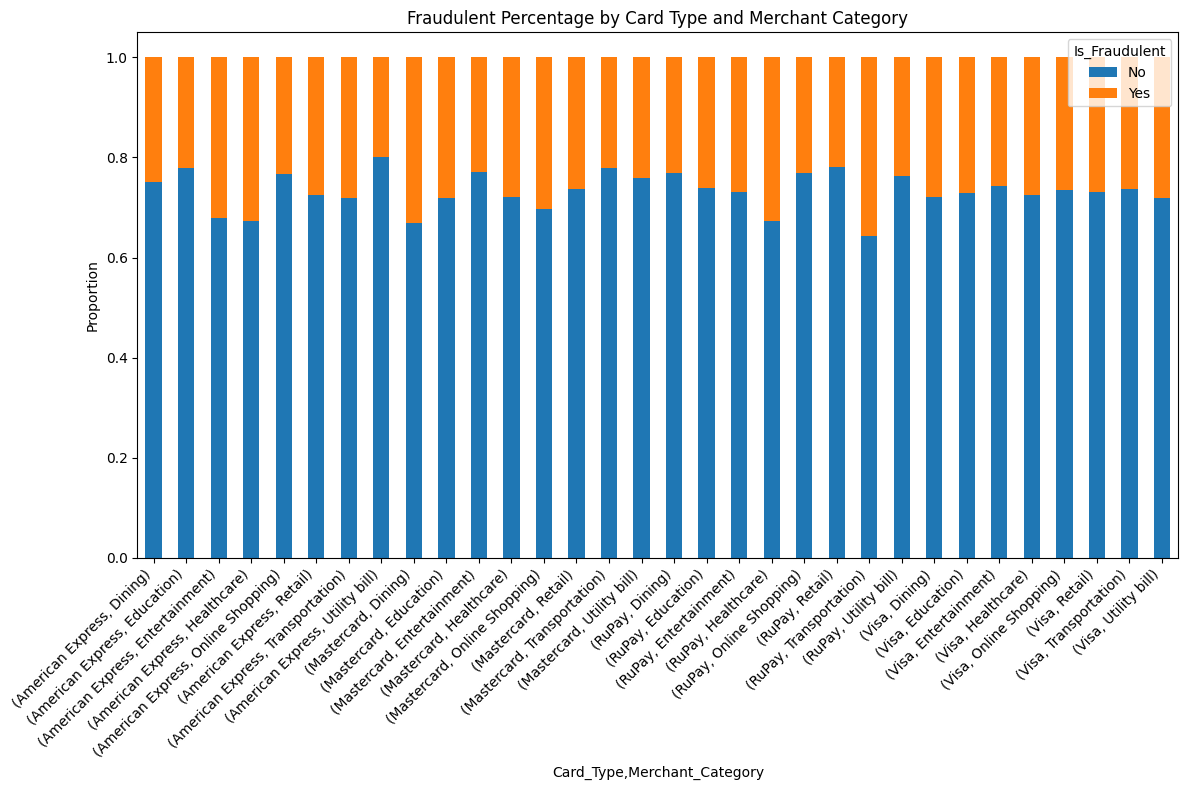

In [ ]:
# multivariate analysis for categorical features (using a stacked bar chart) This requires grouping and aggregating data, as a direct countplot won't show the multivariate relationship directly.
#For example, analyzing Fraud by Card Type and Merchant Category You might need to group by both features and then analyze the fraud rate within those groups.
grouped_data = df.groupby(['Card_Type', 'Merchant_Category'])['Is_Fraudulent'].value_counts(normalize=True).unstack().fillna(0)
grouped_data.plot(kind='bar', stacked=True, figsize=(12, 8))
plt.title('Fraudulent Percentage by Card Type and Merchant Category')
plt.ylabel('Proportion')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

##Visualize the distribution of transaction amounts for fraudulent vs. non-fraudulent transactions using histograms or box plots.

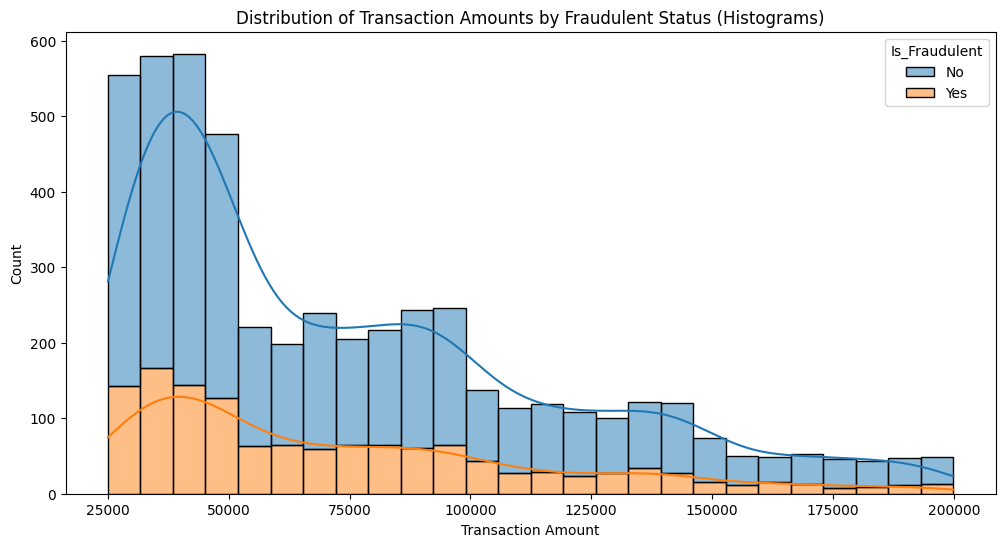

In [ ]:
# Histograms
plt.figure(figsize=(12, 6))
sns.histplot(data=df, x='Transaction_Amount', hue='Is_Fraudulent', multiple='stack', kde=True)
plt.title('Distribution of Transaction Amounts by Fraudulent Status (Histograms)')
plt.xlabel('Transaction Amount')
plt.ylabel('Count')
plt.show()

##Investigate whether certain features are more susceptible to fraud.

 1. Categorical Features vs Fraud

In [ ]:
print("Fraud rate by Card Type:")
print(pd.crosstab(df['Card_Type'], df['Is_Fraudulent'], normalize='index') * 100)

print("\nFraud rate by Merchant Category (sorted by fraud rate):")
print(pd.crosstab(df['Merchant_Category'], df['Is_Fraudulent'], normalize='index').sort_values('Yes', ascending=False))

print("\nFraud rate by Location (sorted by fraud rate - top 10):")
print(pd.crosstab(df['Location'], df['Is_Fraudulent'], normalize='index').sort_values('Yes', ascending=False).head(10))

Fraud rate by Card Type:
Is_Fraudulent            No        Yes
Card_Type                             
American Express  73.887814  26.112186
Mastercard        73.116883  26.883117
RuPay             74.340021  25.659979
Visa              73.117736  26.882264

Fraud rate by Merchant Category (sorted by fraud rate):
Is_Fraudulent            No       Yes
Merchant_Category                    
Healthcare         0.705645  0.294355
Dining             0.719335  0.280665
Transportation     0.729614  0.270386
Education          0.732177  0.267823
Online Shopping    0.735034  0.264966
Retail             0.740355  0.259645
Entertainment      0.742747  0.257253
Utility bill       0.750480  0.249520

Fraud rate by Location (sorted by fraud rate - top 10):
Is_Fraudulent        No       Yes
Location                         
Kolkata        0.694370  0.305630
Hyderabad      0.706329  0.293671
Jaipur         0.707775  0.292225
Patna          0.716981  0.283019
Kochi          0.722892  0.277108
Mumbai   

 2. Numerical Features vs Fraud

In [ ]:
df['Amount_Bin'] = pd.qcut(df['Transaction_Amount'], q=5)
pd.crosstab(df['Amount_Bin'], df['Is_Fraudulent'], normalize='index') * 100
df['Income_Bin'] = pd.qcut(df['Cardholder_Monthly_Income'], q=4)
pd.crosstab(df['Income_Bin'], df['Is_Fraudulent'], normalize='index') * 100
df['Age_Bin'] = pd.cut(df['Cardholder_Age'], bins=[18, 30, 40, 50, 60, 100])
pd.crosstab(df['Age_Bin'], df['Is_Fraudulent'], normalize='index') * 100

Is_Fraudulent,No,Yes
Age_Bin,,
"(18, 30]",73.586957,26.413043
"(30, 40]",73.257288,26.742712
"(40, 50]",72.096128,27.903872
"(50, 60]",73.306233,26.693767
"(60, 100]",73.830594,26.169406


| Feature             | High-Risk Clue                                  |
| ------------------- | ----------------------------------------------- |
| Card\_Type          | One type shows disproportionately high fraud    |
| Merchant\_Category  | Specific categories (e.g., electronics, online) |
| Location            | Some cities or branches have higher fraud rates |
| Transaction\_Amount | Higher value bins have more fraud               |
| Monthly\_Income     | Fraud concentrated in low/high income brackets  |
| Cardholder\_Age     | Fraud common in certain age groups              |


/tmp/ipython-input-17-1579265211.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=rates.values, y=rates.index, ax=ax, palette='viridis')
/tmp/ipython-input-17-1579265211.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=rates.values, y=rates.index, ax=ax, palette='viridis')
/tmp/ipython-input-17-1579265211.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=rates.values, y=rates.index, ax=ax, palette='viridis')
/tmp/ipython-input-17-1579265211.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and w

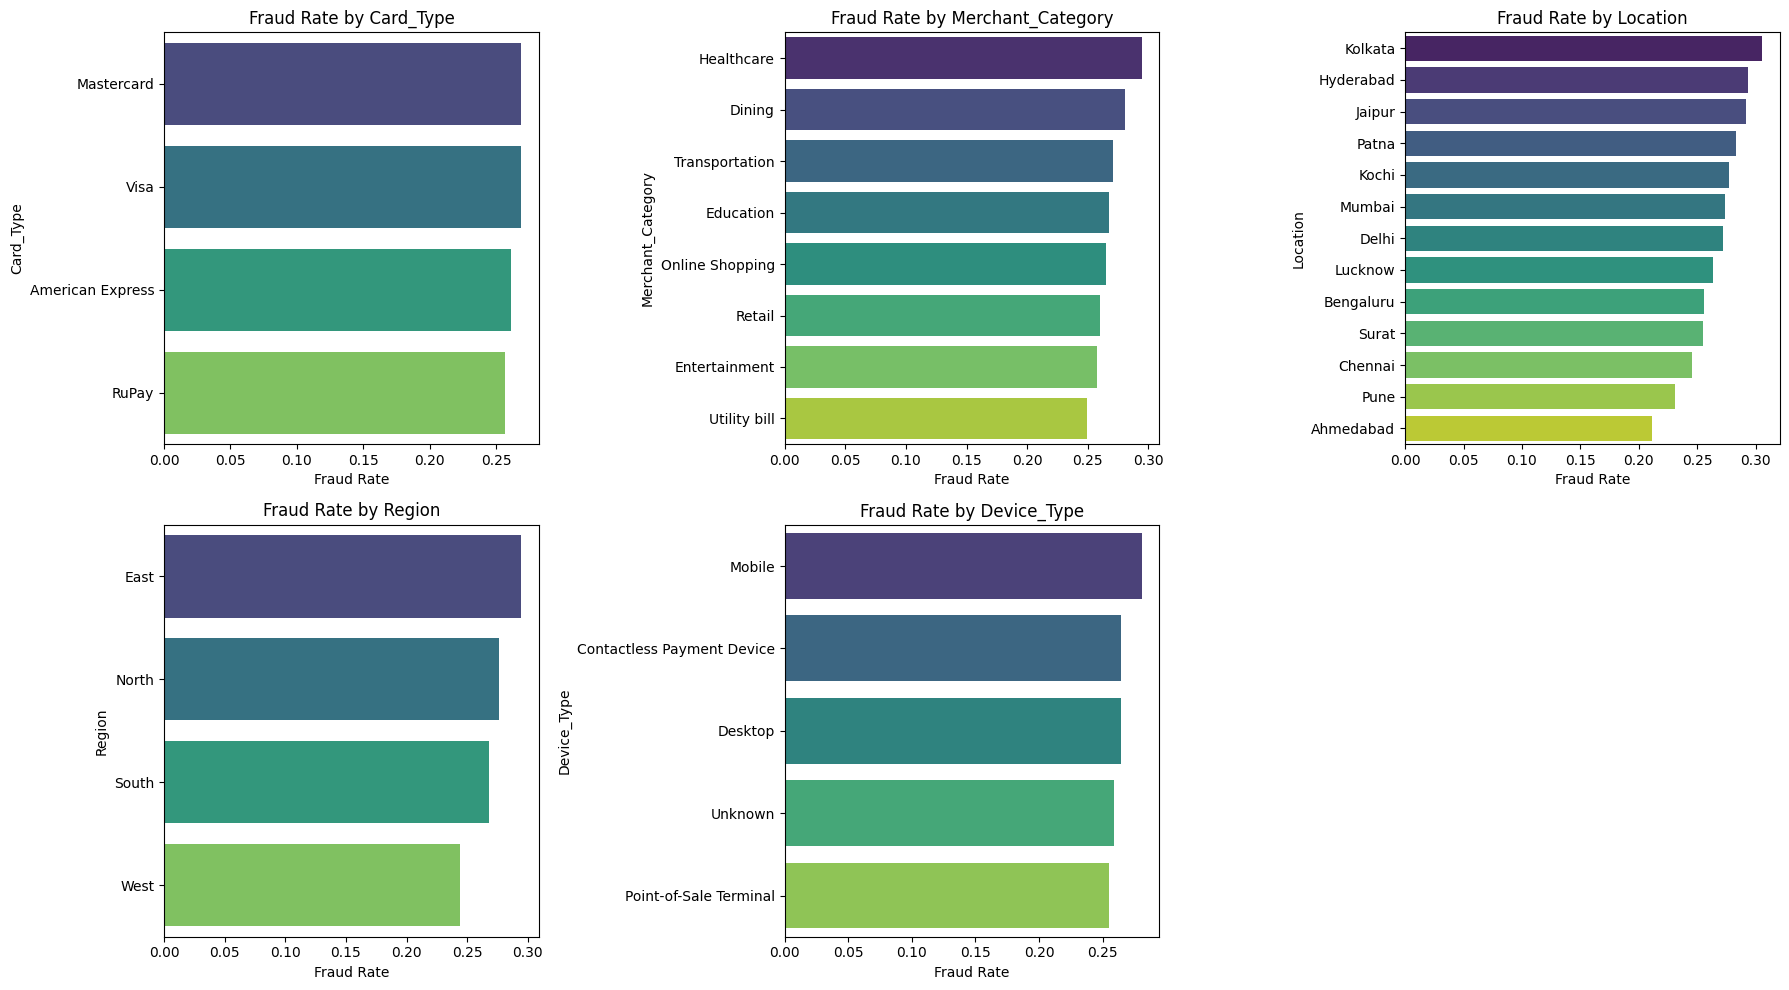

In [ ]:
# e) Investigate which features are more susceptible to fraud using fraud rate by category
categorical_features = ['Card_Type', 'Merchant_Category', 'Location', 'Region', 'Device_Type']

# Convert 'Is_Fraudulent' to numerical (1 for 'Yes', 0 for 'No')
df['Is_Fraudulent_Numerical'] = df['Is_Fraudulent'].apply(lambda x: 1 if x == 'Yes' else 0)


# Calculate fraud rate for each category within categorical features
fraud_rates = {}
for feature in categorical_features:
    fraud_rate = df.groupby(feature)['Is_Fraudulent_Numerical'].mean().sort_values(ascending=False)
    fraud_rates[feature] = fraud_rate

# Plot fraud rate for each feature
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(18, 10))
axes = axes.flatten()

for ax, (feature, rates) in zip(axes, fraud_rates.items()):
    sns.barplot(x=rates.values, y=rates.index, ax=ax, palette='viridis')
    ax.set_title(f'Fraud Rate by {feature}')
    ax.set_xlabel('Fraud Rate')
    ax.set_ylabel(feature)

# Hide the unused subplot
fig.delaxes(axes[-1])

plt.tight_layout()
plt.show()

#Data Preprocessing - Data Cleaning:

##Handle missing values if any, using appropriate techniques such as KNNImputer; mean or median imputation for numerical features, and mode imputation for categorical features.

In [ ]:
df.isnull().sum()

,0
Transaction_ID,0
Transaction_Amount,0
Transaction_DateTime,0
Region,0
Cardholder_Age,0
Cardholder_Gender,0
Cardholder_Monthly_Income,0
Cardholder_Average_Spend,0
Credit_Limit,0
Device_Type,0


In [ ]:
cols_to_fil_mode=['Income_Bin', 'Age_Bin', 'Amount_Bin']

In [ ]:
for col in cols_to_fil_mode:
  df[col]=df[col].fillna(df[col].mode()[0])

In [ ]:
df.isnull().sum()

,0
Transaction_ID,0
Transaction_Amount,0
Transaction_DateTime,0
Region,0
Cardholder_Age,0
Cardholder_Gender,0
Cardholder_Monthly_Income,0
Cardholder_Average_Spend,0
Credit_Limit,0
Device_Type,0


In [ ]:
df.shape

(5000, 19)

##Check for outliers in numerical features using statistical methods like Z-score or IQR (Interquartile Range) and remove them if necessary to ensure data quality.

In [ ]:
# Numerical columns for outlier detection
numerical_cols = ['Transaction_Amount', 'Cardholder_Age',
                  'Cardholder_Monthly_Income', 'Cardholder_Average_Spend']

In [ ]:
# Function to remove outliers using IQR
def remove_outliers_iqr(data, cols):
    cleaned_data = data.copy()
    for col in cols:
        Q1 = cleaned_data[col].quantile(0.25)
        Q3 = cleaned_data[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        cleaned_data = cleaned_data[(cleaned_data[col] >= lower_bound) & (cleaned_data[col] <= upper_bound)]
    return cleaned_data

In [ ]:
# Apply the function
df_no_outliers = remove_outliers_iqr(df, numerical_cols)

In [ ]:
# Compare shape before and after removing outliers
original_shape = df.shape
cleaned_shape = df_no_outliers.shape
print("Original_Shape:", original_shape)
print("Cleaned_Shape", cleaned_shape)


Original_Shape: (5000, 19)
Cleaned_Shape (4747, 19)


Chart for Outlier

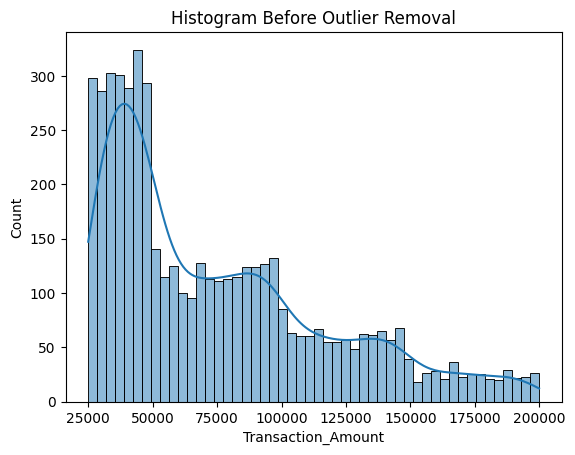

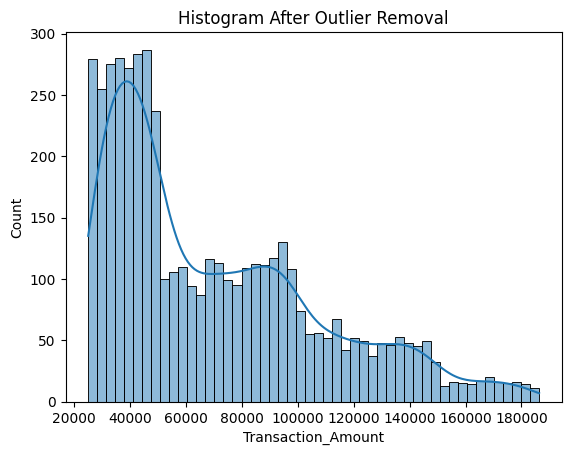

In [ ]:
sns.histplot(df['Transaction_Amount'], bins=50, kde=True)
plt.title("Histogram Before Outlier Removal")
plt.show()
sns.histplot(df_no_outliers['Transaction_Amount'], bins=50, kde=True)
plt.title("Histogram After Outlier Removal")
plt.show()

##Assess skewness in numerical features by calculating the skewness score. If any features are highly skewed, consider applying transformations such as square root or log transformation to improve their distribution before scaling, if needed.

In [ ]:
skewness=df[['Transaction_Amount', 'Cardholder_Age', 'Cardholder_Monthly_Income', 'Cardholder_Average_Spend']].skew()
print(skewness)

Transaction_Amount           0.969086
Cardholder_Age               0.040108
Cardholder_Monthly_Income    0.454252
Cardholder_Average_Spend     1.208688
dtype: float64


In [ ]:
#Log Transformation
df['Transaction_Amount_Log'] = np.log1p(df['Transaction_Amount'])  # log1p avoids log(0)
df['Cardholder_Monthly_Income_Log'] = np.log1p(df['Cardholder_Monthly_Income'])
df['Cardholder_Average_Spend_Log'] = np.log1p(df['Cardholder_Average_Spend'])
print("Transaction_Amount:", df['Transaction_Amount_Log'])
print("Cardholder_Monthly_Income_Log:", df['Cardholder_Monthly_Income_Log'])
print("Cardholder_Average_Spend_Log:", df['Cardholder_Average_Spend_Log'])

Transaction_Amount: 0       10.211524
1       11.338060
2       12.171900
3       12.028034
4       11.304313
          ...    
4995    10.505314
4996    10.667116
4997    10.427891
4998    10.563078
4999    10.453717
Name: Transaction_Amount_Log, Length: 5000, dtype: float64
Cardholder_Monthly_Income_Log: 0       11.457762
1       11.905771
2       12.259244
3       11.905447
4       12.069514
          ...    
4995    11.051144
4996    10.478864
4997    11.016479
4998    11.111686
4999    10.972705
Name: Cardholder_Monthly_Income_Log, Length: 5000, dtype: float64
Cardholder_Average_Spend_Log: 0       10.501517
1       11.398413
2       11.577491
3       12.061951
4       10.872638
          ...    
4995    10.439792
4996     9.887429
4997    10.430520
4998    10.403936
4999    10.581858
Name: Cardholder_Average_Spend_Log, Length: 5000, dtype: float64


In [ ]:
#Square Root Transformation
df['Transaction_Amount_Sqrt'] = np.sqrt(df['Transaction_Amount'])
print("Transaction_Amount_Sqrt:", df['Transaction_Amount_Sqrt'])

Transaction_Amount_Sqrt: 0       164.966663
1       289.751618
2       439.636213
3       409.122231
4       284.903492
           ...    
4995    191.070668
4996    207.171427
4997    183.815125
4998    196.669774
4999    186.204189
Name: Transaction_Amount_Sqrt, Length: 5000, dtype: float64


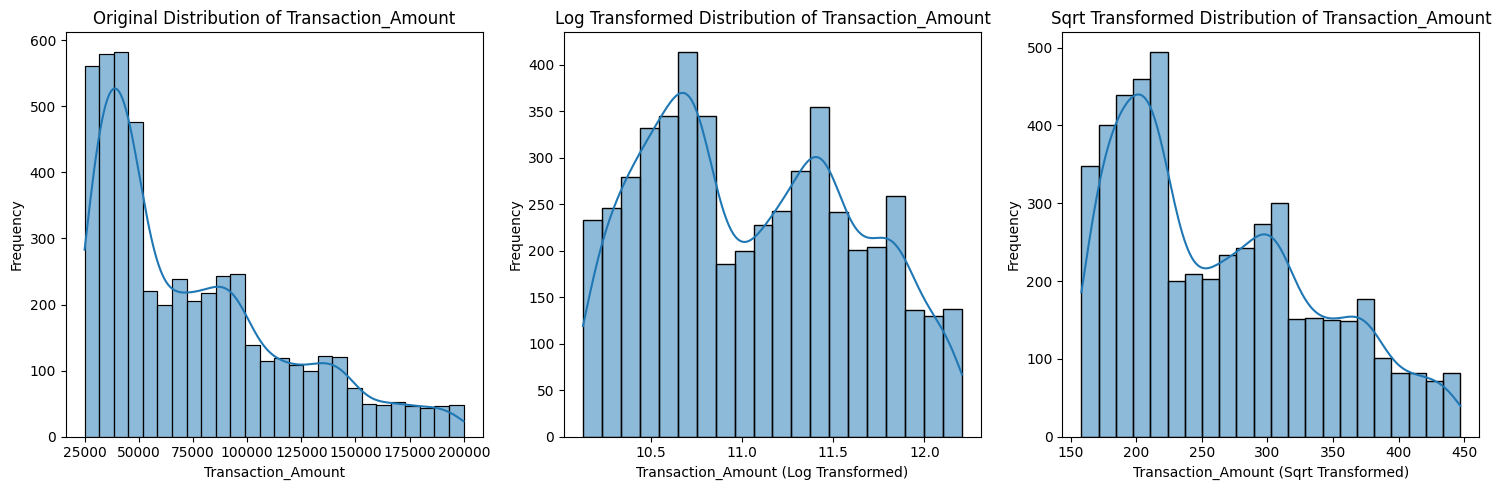

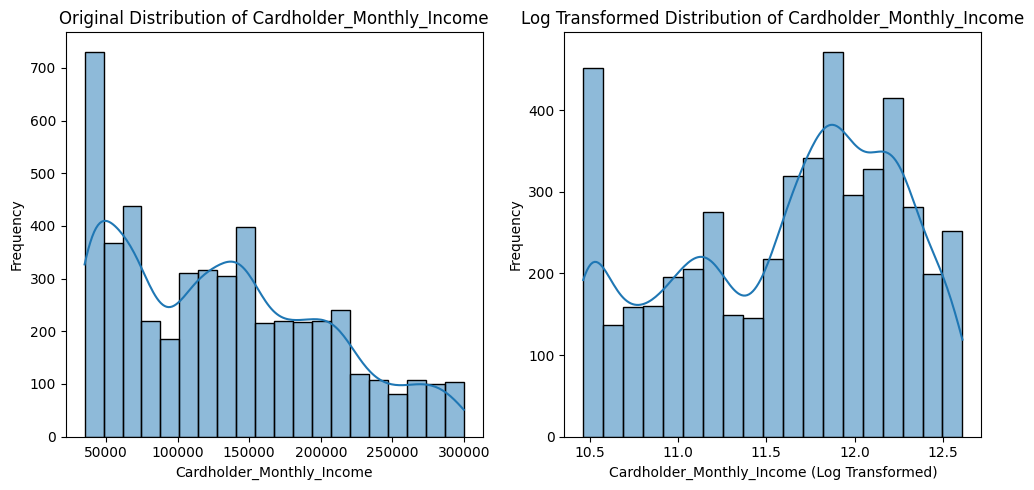

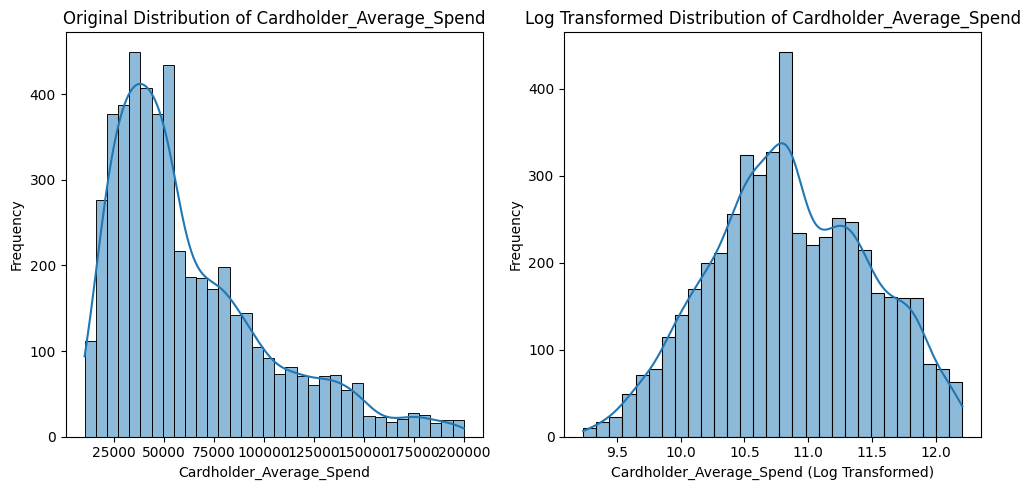

In [ ]:
# prompt: Plot the original and transformed distributions

# List of numerical features that were transformed
transformed_numerical_features = ['Transaction_Amount', 'Cardholder_Monthly_Income', 'Cardholder_Average_Spend'] # Cardholder_Age was not significantly skewed

for feature in transformed_numerical_features:
    plt.figure(figsize=(15, 5)) # Increased figure size for better visualization of 3 subplots

    # Plot original distribution
    plt.subplot(1, 3, 1)
    sns.histplot(df[feature], kde=True)
    plt.title(f'Original Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')


    # Plot Log Transformed Distribution (check if log transformed column exists)
    log_col_name = feature + '_Log' # Use _Log as created in cell H4wwx617Jumi
    if log_col_name in df.columns:
        plt.subplot(1, 3, 2)
        sns.histplot(df[log_col_name], kde=True)
        plt.title(f'Log Transformed Distribution of {feature}')
        plt.xlabel(f'{feature} (Log Transformed)')
        plt.ylabel('Frequency')
    else:
         print(f"Warning: Log transformed column '{log_col_name}' not found for {feature}.")


    # Plot Sqrt Transformed Distribution (check if sqrt transformed column exists)
    sqrt_col_name = feature + '_Sqrt' # Use _Sqrt as created in cell kfihO4gaJ8IL
    if sqrt_col_name in df.columns:
        plt.subplot(1, 3, 3)
        sns.histplot(df[sqrt_col_name], kde=True)
        plt.title(f'Sqrt Transformed Distribution of {feature}')
        plt.xlabel(f'{feature} (Sqrt Transformed)')
        plt.ylabel('Frequency')
    else:
         print(f"Warning: Sqrt transformed column '{sqrt_col_name}' not found for {feature}.")


    plt.tight_layout()
    plt.show()

#Feature Engineering :

## Identify the categorical features in the dataset.

In [ ]:
categorical_features = df.select_dtypes(include=['object', 'category']).columns.tolist()
print("Categorical Features:", categorical_features)

Categorical Features: ['Transaction_ID', 'Card_Type', 'Merchant_Category', 'Transaction_DateTime', 'Location', 'Region', 'Cardholder_Gender', 'Device_Type', 'Day_of_Week', 'Is_Fraudulent', 'Amount_Bin', 'Income_Bin', 'Age_Bin']


In [ ]:
# Find numerical columns with few unique values (typically categorical)
possible_categoricals = []
for col in df.select_dtypes(include=['int64', 'float64']):
    if df[col].nunique() < 10:  # You can adjust the threshold
        possible_categoricals.append(col)

print("Numerical columns that may be categorical:", possible_categoricals)

Numerical columns that may be categorical: ['Credit_Limit', 'Is_Fraudulent_Numerical']


##Encode categorical features to numerical using techniques like one-hot encoding or label encoding techniques to prepare the data for machine learning algorithms.

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
categorical_cols = ['Card_Type', 'Merchant_Category', 'Location']

In [ ]:
le = LabelEncoder()

for col in categorical_cols:
    df[col] = le.fit_transform(df[col])

In [ ]:
df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

#Feature Selection:

##Select relevant features that have the most impact on predicting fraudulent transactions.

In [ ]:
# Select only numeric columns for correlation calculation
numeric_df = df.select_dtypes(include=np.number)

In [ ]:
# Compute correlation matrix
corr_matrix = numeric_df.corr()

In [ ]:
# Visualize correlation with the target
# Make sure the target column exists in the numeric_df
if 'Is_Fraudulent_Numerical' in numeric_df.columns:
    target_corr = corr_matrix['Is_Fraudulent_Numerical'].sort_values(ascending=False)
    print(target_corr)
else:
    print("Target column 'Is_Fraudulent_Numerical' not found in the numeric DataFrame.")

Is_Fraudulent_Numerical          1.000000
Cardholder_Age                  -0.004104
Cardholder_Average_Spend_Log    -0.005699
Cardholder_Monthly_Income_Log   -0.010556
Cardholder_Average_Spend        -0.012505
Credit_Limit                    -0.012855
Cardholder_Monthly_Income       -0.015103
Transaction_Amount_Log          -0.016631
Transaction_Amount_Sqrt         -0.019063
Transaction_Amount              -0.021193
Name: Is_Fraudulent_Numerical, dtype: float64


In [ ]:
from sklearn.feature_selection import chi2
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import SelectKBest

In [ ]:
# Encode categorical features
df_encoded = df.copy()
label_encoder = LabelEncoder()
for col in df_encoded.select_dtypes(include=['object']).columns:
    df_encoded[col] = label_encoder.fit_transform(df_encoded[col])

In [ ]:
# Drop interval columns
df_encoded = df_encoded.drop(['Amount_Bin', 'Income_Bin', 'Age_Bin'], axis=1)

In [ ]:
# Apply chi-square
X = df_encoded.drop('Is_Fraudulent_Numerical', axis=1)
y = df_encoded['Is_Fraudulent_Numerical']

In [ ]:
# Select only non-object type columns for chi2
X = X.select_dtypes(exclude=['object'])

chi_scores = chi2(X, y)

# Print top features
feature_scores = pd.Series(chi_scores[0], index=X.columns)
print(feature_scores.sort_values(ascending=False))

Transaction_Amount               55896.763989
Cardholder_Monthly_Income        44694.203595
Credit_Limit                     20515.568123
Cardholder_Average_Spend         19268.976559
Is_Fraudulent                     3668.000000
Transaction_DateTime               806.014013
Transaction_ID                     448.687797
Transaction_Amount_Sqrt             39.089217
Region                               4.272711
Card_Type_4                          3.626743
Location_7                           2.937328
Location_11                          2.359135
Merchant_Category_3                  1.983363
Location_4                           1.503149
Location_5                           1.272925
Cardholder_Gender                    1.096249
Location_2                           0.866807
Merchant_Category_8                  0.805347
Merchant_Category_7                  0.759593
Cardholder_Age                       0.596390
Location_10                          0.524304
Card_Type_2                       

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
model = RandomForestClassifier()
model.fit(X, y)

# Get feature importances
importances = pd.Series(model.feature_importances_, index=X.columns)
important_features = importances.sort_values(ascending=False)
print(important_features.head(10))


Is_Fraudulent                    0.878545
Transaction_ID                   0.009890
Transaction_DateTime             0.009794
Cardholder_Average_Spend         0.009365
Transaction_Amount               0.009284
Transaction_Amount_Sqrt          0.008994
Transaction_Amount_Log           0.008865
Cardholder_Average_Spend_Log     0.008727
Cardholder_Monthly_Income        0.008465
Cardholder_Monthly_Income_Log    0.008349
dtype: float64


In [ ]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

In [ ]:
model = LogisticRegression()

In [ ]:
rfe = RFE(LogisticRegression(), n_features_to_select=10)
rfe.fit(X, y)
selected_features = X.columns[rfe.support_]
print("Top selected features:", selected_features)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Top selected features: Index(['Is_Fraudulent', 'Transaction_Amount_Log',
       'Cardholder_Monthly_Income_Log', 'Cardholder_Average_Spend_Log',
       'Card_Type_2', 'Merchant_Category_3', 'Merchant_Category_7',
       'Location_2', 'Location_4', 'Location_11'],
      dtype='object')


##Identify and remove redundant or irrelevant features that do not contribute significantly to the prediction task.

In [ ]:
from sklearn.feature_selection import VarianceThreshold

In [ ]:
selector = VarianceThreshold(threshold=0.01)
selector.fit(df.select_dtypes(include=['number']))
low_variance_cols = df.select_dtypes(include=['number']).columns[~selector.get_support()]
print("Low variance features to drop:", low_variance_cols.tolist())

Low variance features to drop: []


In [ ]:
# Compute correlation matrix
corr_matrix = df.corr(numeric_only=True).abs()

In [ ]:
# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

In [ ]:
# Identify features with correlation > 0.9
to_drop = [column for column in upper.columns if any(upper[column] > 0.9)]

print("Highly correlated features to drop:", to_drop)

Highly correlated features to drop: ['Transaction_Amount_Log', 'Cardholder_Monthly_Income_Log', 'Cardholder_Average_Spend_Log', 'Transaction_Amount_Sqrt']


In [ ]:
# Drop them
df.drop(columns=to_drop, inplace=True)

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
# Fit model (replace `target` with your actual target column name)
X = df.drop('Is_Fraudulent_Numerical', axis=1)
y = df['Is_Fraudulent_Numerical']

# Select only numeric columns for the model
X = X.select_dtypes(include=np.number)


model = RandomForestClassifier()
model.fit(X, y)

RandomForestClassifier()

In [ ]:
# Get importance
importances = pd.Series(model.feature_importances_, index=X.columns)
low_importance = importances[importances < 0.01].index.tolist()

print("Low importance features to drop:", low_importance)

Low importance features to drop: []


**Final Result**

After these steps, your dataset will contain:

No low-variance noise

No redundant highly correlated features

No irrelevant ID or metadata

Only features that meaningfully contribute to fraud prediction

#Split data into training and testing:

##Divide the dataset into training and testing sets to evaluate the model's performance.

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X = df.drop(['Is_Fraudulent', 'Transaction_ID', 'Transaction_DateTime', 'Region', 'Cardholder_Gender', 'Device_Type', 'Day_of_Week', 'Amount_Bin', 'Income_Bin', 'Age_Bin'], axis=1)
y = df['Is_Fraudulent'].apply(lambda x: 1 if x == 'Yes' else 0) # Convert target to numerical

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y)

In [ ]:
print("X-Training set shape:", X_train.shape)
print("X-Testing set shape:", X_test.shape)
print("y-Training set shape:", y_train.shape)
print("y-Testing set shape:", y_test.shape)

X-Training set shape: (4000, 30)
X-Testing set shape: (1000, 30)
y-Training set shape: (4000,)
y-Testing set shape: (1000,)


##Ensure that both sets maintain the same distribution of fraudulent and non-fraudulent transactions to avoid data leakage.

In [ ]:
# Distribution in the original dataset
print("Full dataset class distribution:")
print(y.value_counts(normalize=True))

# Training set
print("\nTraining set class distribution:")
print(y_train.value_counts(normalize=True))

# Testing set
print("\nTesting set class distribution:")
print(y_test.value_counts(normalize=True))


Full dataset class distribution:
Is_Fraudulent
0    0.7336
1    0.2664
Name: proportion, dtype: float64

Training set class distribution:
Is_Fraudulent
0    0.7335
1    0.2665
Name: proportion, dtype: float64

Testing set class distribution:
Is_Fraudulent
0    0.734
1    0.266
Name: proportion, dtype: float64


#Feature Scaling:

##Scale numerical features to ensure that they have the same magnitude, preventing some features from dominating others during model training.

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
# Step 1: Identify numerical features
numeric_cols = X_train.select_dtypes(include=['int64', 'float64']).columns

In [ ]:
# Step 2: Initialize scaler
scaler = StandardScaler()

In [ ]:
# Step 3: Fit on training set and transform both sets
X_train[numeric_cols] = scaler.fit_transform(X_train[numeric_cols])
X_test[numeric_cols] = scaler.transform(X_test[numeric_cols])

##Common scaling techniques include Min-Max scaling or Standardization (Z-scorenormalization).

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
scaler = MinMaxScaler()
X_train[numeric_cols] = scaler.fit_transform(X_train[numeric_cols])
X_test[numeric_cols] = scaler.transform(X_test[numeric_cols])

#Build the Machine Learning Model:

##Import the necessary modules and libraries for building and evaluating machine learning models.

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report, roc_auc_score, roc_curve
from sklearn.feature_selection import SelectKBest, chi2, RFE

##Define a list or dictionary of classifiers to be evaluated; including Logistic Regression, Naive Bayes, Decision Tree, Random Forest, K-Nearest Neighbors, and SVM. Then, compute the accuracy score and F1-score for each classifier.

In [ ]:
classifiers = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Naive Bayes": GaussianNB(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Support Vector Machine": SVC()
}

In [ ]:
# Train and evaluate each model
results = []

for name, model in classifiers.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    acc = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    results.append({'Model': name, 'Accuracy': acc, 'F1 Score': f1})

# Convert results to DataFrame for better view
results_df = pd.DataFrame(results)
print(results_df.sort_values(by='F1 Score', ascending=False))

                    Model  Accuracy  F1 Score
0     Logistic Regression     1.000  1.000000
2           Decision Tree     1.000  1.000000
3           Random Forest     1.000  1.000000
4     K-Nearest Neighbors     0.687  0.195373
1             Naive Bayes     0.734  0.000000
5  Support Vector Machine     0.734  0.000000


##Select a machine learning algorithm for binary classification with the highest accuracy or F1-score from the above step.

In [ ]:
# Sort by F1 Score (or Accuracy, if preferred)
best_model_row = results_df.sort_values(by='F1 Score', ascending=False).iloc[0]

In [ ]:
# Extract model name and performance
best_model_name = best_model_row['Model']
best_accuracy = best_model_row['Accuracy']
best_f1 = best_model_row['F1 Score']

In [ ]:
print(f"  Best Model: {best_model_name}")
print(f"   - Accuracy: {best_accuracy:.4f}")
print(f"   - F1 Score: {best_f1:.4f}")

  Best Model: Logistic Regression
   - Accuracy: 1.0000
   - F1 Score: 1.0000


##Validate the model's performance on the testing dataset and interpret the results to assess its effectiveness in detecting fraudulent transactions.

|                     | Predicted No Fraud   | Predicted Fraud      |
| ------------------- | -------------------- | -------------------- |
| **Actual No Fraud** | True Negatives (TN)  | False Positives (FP) |
| **Actual Fraud**    | False Negatives (FN) | True Positives (TP)  |


| Metric               | Interpretation                                                                                                              |
| -------------------- | --------------------------------------------------------------------------------------------------------------------------- |
| **Accuracy**         | Overall correct predictions, but misleading in imbalanced datasets.   
                                                      |
| **Precision**        | Of all predicted frauds, how many were correct (minimizes false positives).
                                                |
| **Recall**           | Of all actual frauds, how many were caught (minimizes false negatives) — **critical in fraud detection**.   
                |
| **F1 Score**         | Best single score balancing precision & recall — useful for imbalanced data.      
                                          |
| **Confusion Matrix** | Helps identify if the model is missing a lot of actual frauds (high FN) or wrongly flagging normal ones as fraud (high FP). |


The Random Forest model is effective in detecting fraudulent transactions, with:

High predictive accuracy

Strong fraud detection (recall)

Balanced trade-off with false positives